・相関の分析は攻撃、守備のデータを分けて分析きているのか？（守備の方は冷静さ＝エントロピー差が影響してそうだが、攻撃もなのか？違いある？）

意味がわからん     
守備の方が冷静さが影響するってのはどういうこと?

・エントロピー差って分散と同じでは？＝エントロピー差と得点の分散で相関があるのは当然では？…シーズンによってこれらの結果が変わったりするなら面白いかも

同じじゃない

・エントロピー差の意味…過去のデータが存在することによって、結果が変わるということ。つまり、過去の試合？の結果によって次の試合の結果が変わるという示唆（先生いわく、点数の分散と全く同じというわけではない）

はい

もう検討してたら申し訳ないんですが、冷静でいられるチームの方が勝ちやすい？（もしくは冷静でないチームの方が勝ちやすい）とかは言えなそうですか？
過去の結果の実現に影響されないチームの方が得点が安定するってポイントは理解しました
あと、冷静さの指標になるこのエントロピー差っていうのが、同じチームでどんなときに変動するのか？とかはゼミ生にコメントされました
たとえば監督によって冷静さが変わるのか？とか熱血プレイヤーの加入で変わるのか？とかですね

順位との間に目立った相関はなさそう     
エントロピー差が大きく変わった年に監督が変わっているかは見てもいいかも

In [3]:
import pandas as pd
import numpy as np
import re
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from itertools import product
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
#plt.style.use('seaborn-pastel')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tq

sys.path.append("..")
from utils.util_functions import *

In [4]:
event_df = make_df(data_dir=DETAIL_DATA_DIR_MLB)
df_2017 = make_df(end=1944417, data_dir=DETAIL_DATA_DIR_MLB)
df_2018 = make_df(start=1944417, data_dir=DETAIL_DATA_DIR_MLB)
files = os.listdir(DETAIL_DATA_DIR_MLB)[1:]
names = pd.Series(files).apply(lambda x: int(x.split(".")[0]))
files_2017 = names[names<=1944417].apply(lambda x: str(x)+".csv")
files_2018 = names[names>1944417].apply(lambda x: str(x)+".csv")
column = "得点"
teams_mlb = list(set(pd.read_csv(os.path.join(SCORE_DATA_DIR_MLB, "score_mlb.csv"), encoding="cp932", index_col=0).表チーム))
teams_mlb.remove("ア・リーグ")

In [6]:
team = "Rソックス"

In [9]:
df = df_2017[event_df.攻撃チーム==team]
triple = make_inning_triple(make_inning_list(df, score_end=4))
lst = make_flattened_list(triple[4:])
df = pd.DataFrame(lst)
score_diff = df[1].apply(lambda x: x[1])
df = df.applymap(lambda x: x[0])
df["点差"] = score_diff
df_with_score = df[(df[0]!="3000") & (df[1]!="3000")]
improved_lst = [elem for elem in df_with_score[df_with_score.点差<=4][[0, 1, 2]].values.tolist() if is_improved(elem[0], elem[1])]
# H(St+1 | St, St-1)
second_cond_entropy = cond_entropy(pd.DataFrame(improved_lst)[2].values, pd.DataFrame(improved_lst)[[0, 1]].values)
# H(St+1 | St)
first_cond_entropy = cond_entropy(pd.DataFrame(improved_lst)[2].values, pd.DataFrame(improved_lst)[[1]].values)
first_cond_entropy - second_cond_entropy

0.1648508918984266

In [10]:
df = df_2018[event_df.攻撃チーム==team]
triple = make_inning_triple(make_inning_list(df, score_end=4))
lst = make_flattened_list(triple[4:])
df = pd.DataFrame(lst)
score_diff = df[1].apply(lambda x: x[1])
df = df.applymap(lambda x: x[0])
df["点差"] = score_diff
df_with_score = df[(df[0]!="3000") & (df[1]!="3000")]
improved_lst = [elem for elem in df_with_score[df_with_score.点差<=4][[0, 1, 2]].values.tolist() if is_improved(elem[0], elem[1])]
# H(St+1 | St, St-1)
second_cond_entropy = cond_entropy(pd.DataFrame(improved_lst)[2].values, pd.DataFrame(improved_lst)[[0, 1]].values)
# H(St+1 | St)
first_cond_entropy = cond_entropy(pd.DataFrame(improved_lst)[2].values, pd.DataFrame(improved_lst)[[1]].values)
first_cond_entropy - second_cond_entropy

0.1811839198127161

In [12]:
res = dict()
for team in tq(teams_mlb):
    curr = []
    df = df_2017[event_df.攻撃チーム==team]
    triple = make_inning_triple(make_inning_list(df, score_end=4))
    lst = make_flattened_list(triple[4:])
    df = pd.DataFrame(lst)
    score_diff = df[1].apply(lambda x: x[1])
    df = df.applymap(lambda x: x[0])
    df["点差"] = score_diff
    df_with_score = df[(df[0]!="3000") & (df[1]!="3000")]
    improved_lst = [elem for elem in df_with_score[df_with_score.点差<=4][[0, 1, 2]].values.tolist() if is_improved(elem[0], elem[1])]
    # H(St+1 | St, St-1)
    second_cond_entropy = cond_entropy(pd.DataFrame(improved_lst)[2].values, pd.DataFrame(improved_lst)[[0, 1]].values)
    # H(St+1 | St)
    first_cond_entropy = cond_entropy(pd.DataFrame(improved_lst)[2].values, pd.DataFrame(improved_lst)[[1]].values)
    curr.append(first_cond_entropy - second_cond_entropy)
    df = df_2018[event_df.攻撃チーム==team]
    triple = make_inning_triple(make_inning_list(df, score_end=4))
    lst = make_flattened_list(triple[4:])
    df = pd.DataFrame(lst)
    score_diff = df[1].apply(lambda x: x[1])
    df = df.applymap(lambda x: x[0])
    df["点差"] = score_diff
    df_with_score = df[(df[0]!="3000") & (df[1]!="3000")]
    improved_lst = [elem for elem in df_with_score[df_with_score.点差<=4][[0, 1, 2]].values.tolist() if is_improved(elem[0], elem[1])]
    # H(St+1 | St, St-1)
    second_cond_entropy = cond_entropy(pd.DataFrame(improved_lst)[2].values, pd.DataFrame(improved_lst)[[0, 1]].values)
    # H(St+1 | St)
    first_cond_entropy = cond_entropy(pd.DataFrame(improved_lst)[2].values, pd.DataFrame(improved_lst)[[1]].values)
    curr.append(first_cond_entropy - second_cond_entropy)
    res[team] = curr

In [31]:
entropies = pd.DataFrame(list(res.values()), index=res.keys(), columns=[2017, 2018])

In [32]:
entropies.corr()

,2017,2018
2017,1.000000,0.057631
2018,0.057631,1.000000


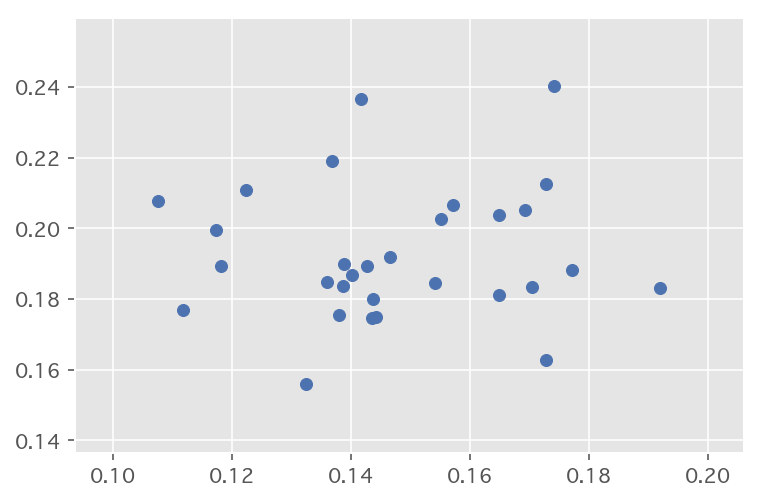

In [34]:
plt.scatter(entropies[2017], entropies[2018])

In [39]:
entropies["rate"] = entropies[2018] / entropies[2017] - 1

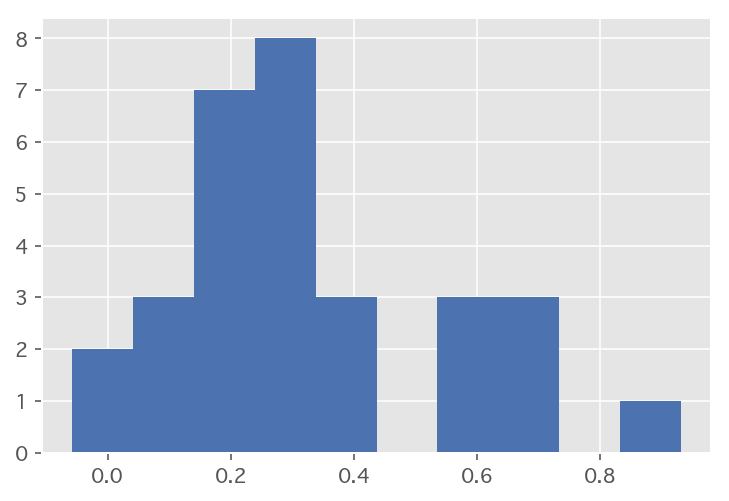

In [42]:
entropies.sort_values("rate")["rate"].hist()